# Explore here

In [57]:
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

data = pd.read_csv(url)
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [47]:
data.info()

data.describe()

data['sex'].value_counts()
data['smoker'].value_counts()
data['region'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

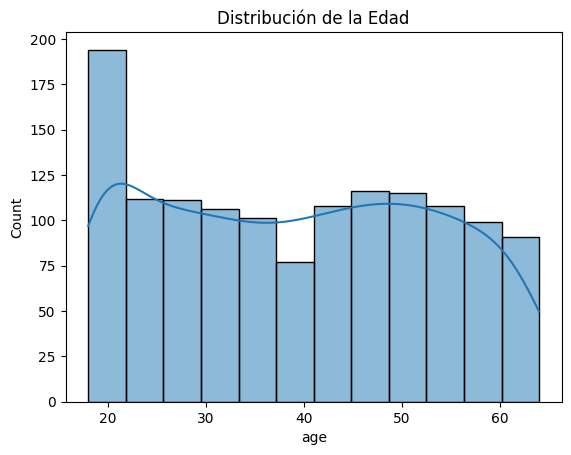

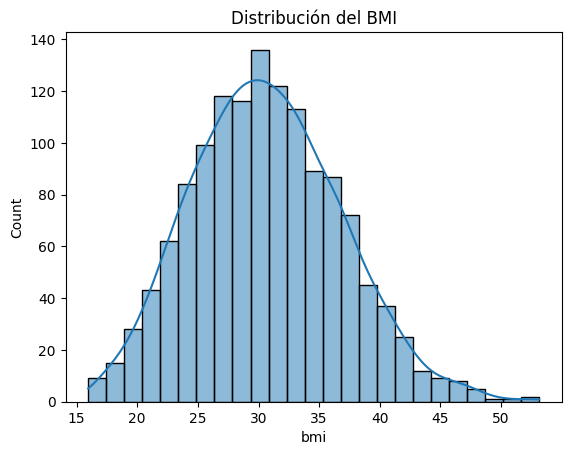

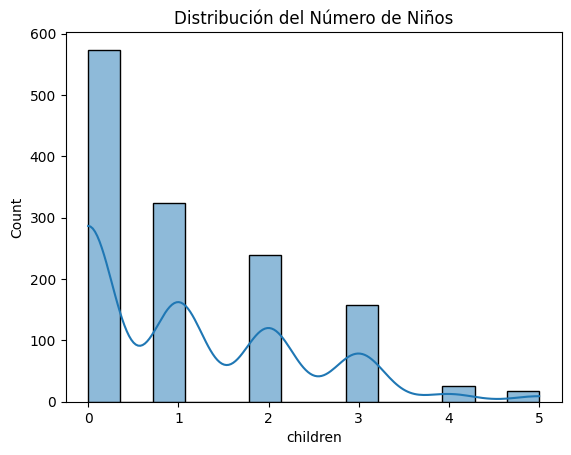

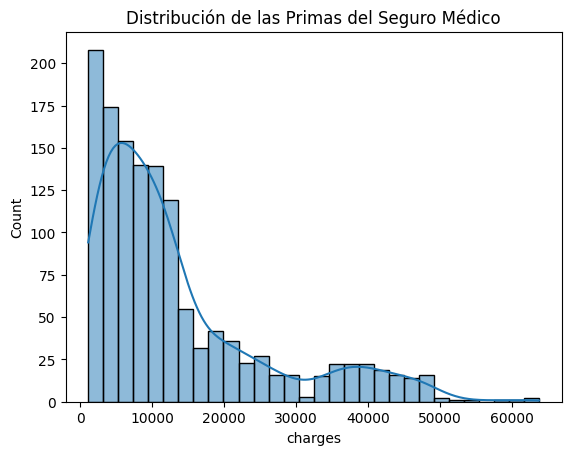

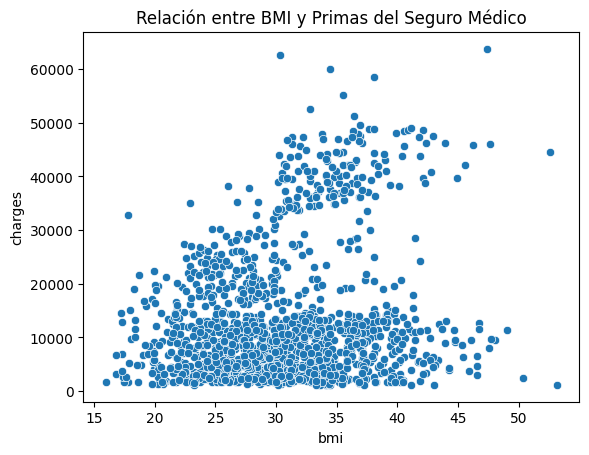

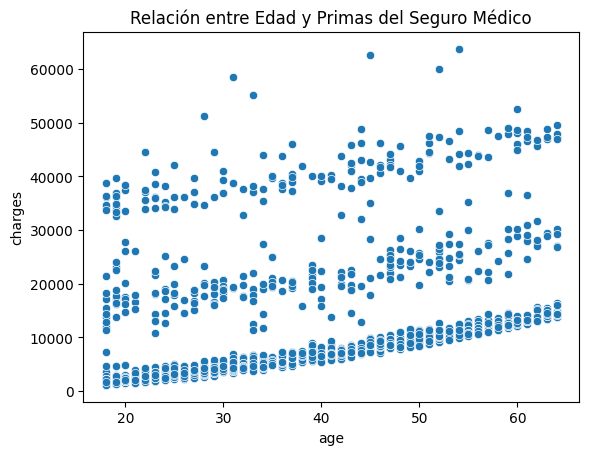

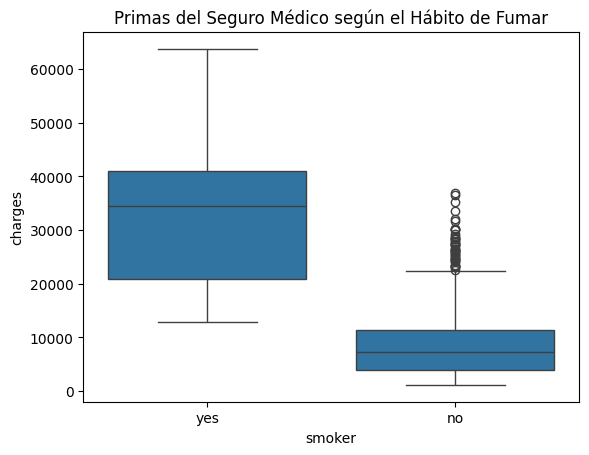

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la edad
sns.histplot(data['age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()
sns.histplot(data['bmi'], kde=True)
plt.title('Distribución del BMI')
plt.show()

sns.histplot(data['children'], kde=True)
plt.title('Distribución del Número de Niños')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Distribución de las Primas del Seguro Médico')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Relación entre BMI y Primas del Seguro Médico')
plt.show()

sns.scatterplot(x='age', y='charges', data=data)
plt.title('Relación entre Edad y Primas del Seguro Médico')
plt.show()

sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Primas del Seguro Médico según el Hábito de Fumar')
plt.show()


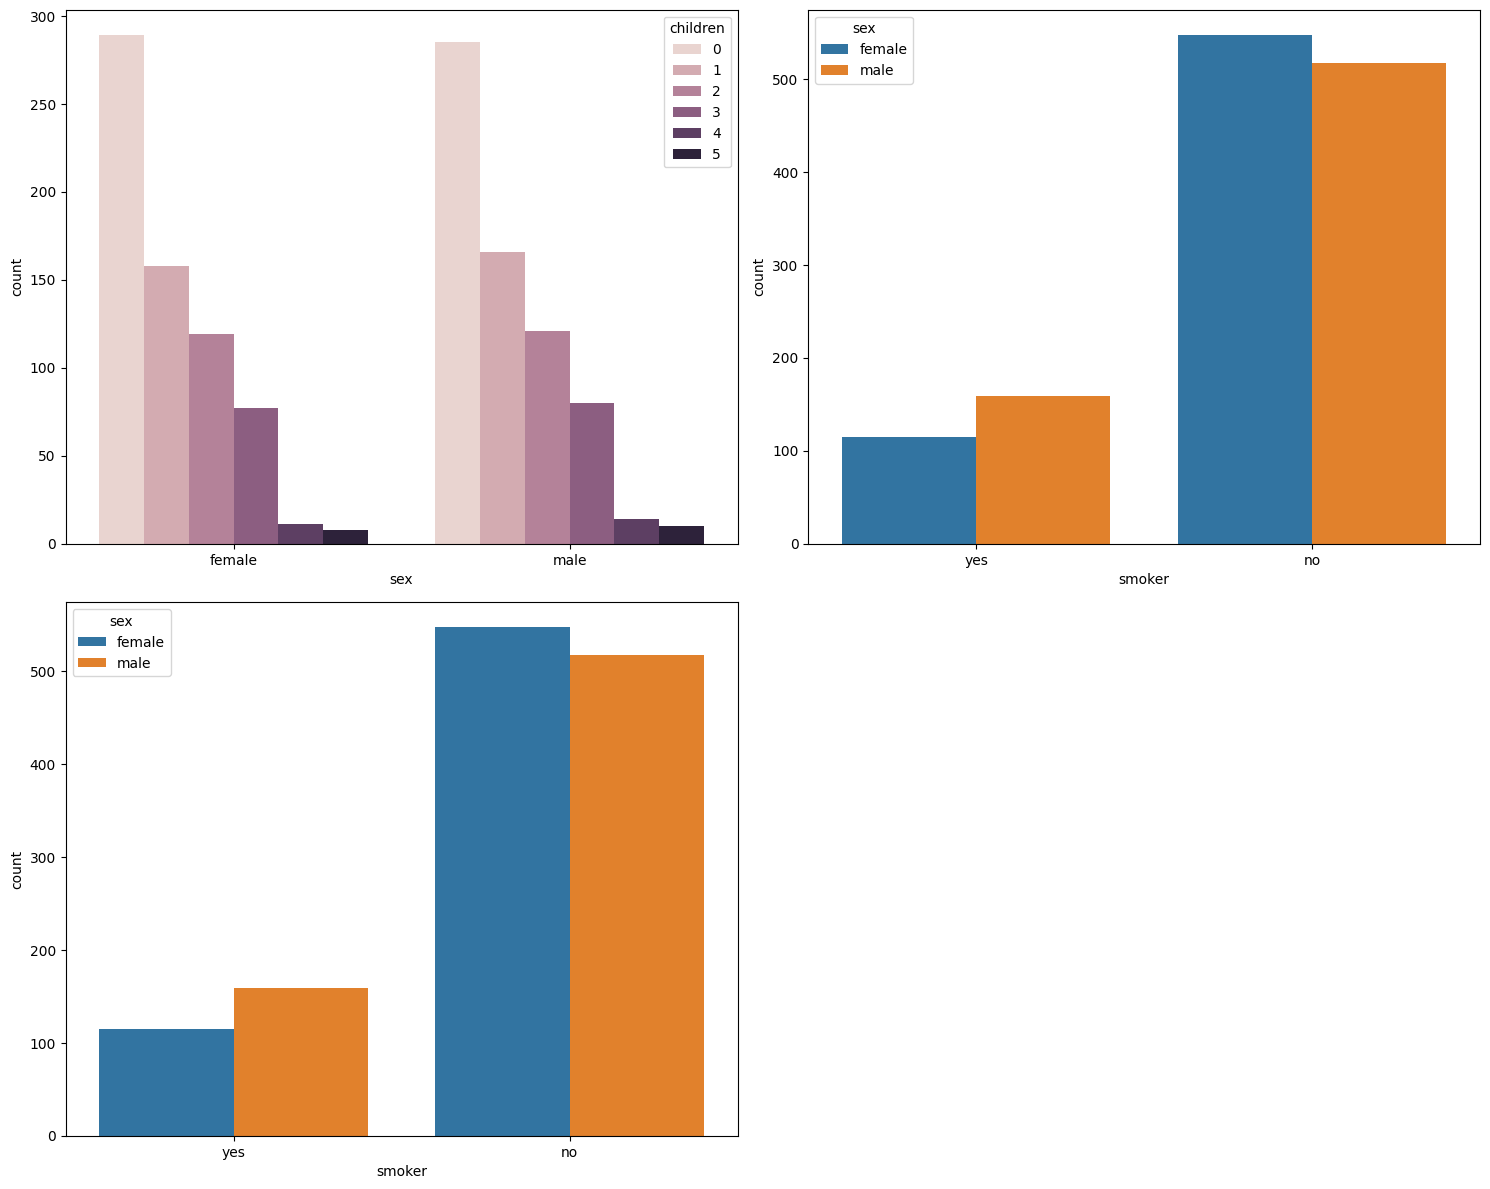

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(ax=axis[0, 0], data=data, x='sex', hue='children')
axis[0, 0]
sns.countplot(ax=axis[0, 1], data=data, x='smoker', hue='sex')
axis[0, 1]

sns.countplot(ax=axis[1, 0], data=data, x='smoker', hue='sex')
axis[1, 0]

fig.delaxes(axis[1, 1])

plt.tight_layout()
plt.show()


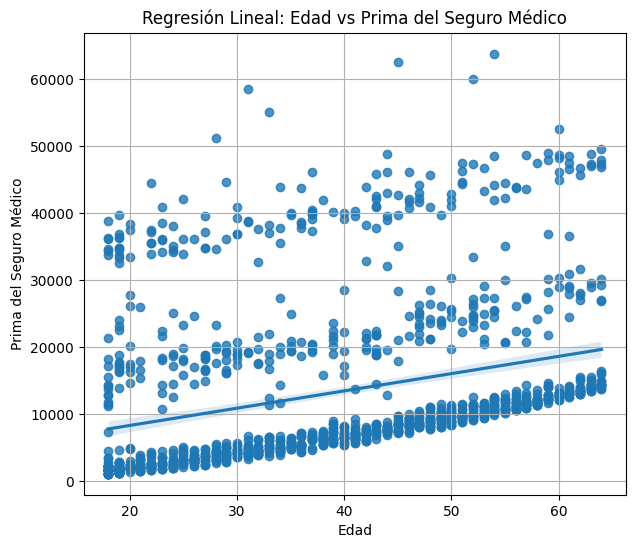

In [50]:
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.regplot(data=data, x='age', y='charges')
plt.title('Regresión Lineal: Edad vs Prima del Seguro Médico')
plt.xlabel('Edad')
plt.ylabel('Prima del Seguro Médico')
plt.grid(True)
plt.show()


/tmp/ipykernel_588/2288817815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='smoker', y='charges', data=data, palette='Set2')
/home/vscode/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


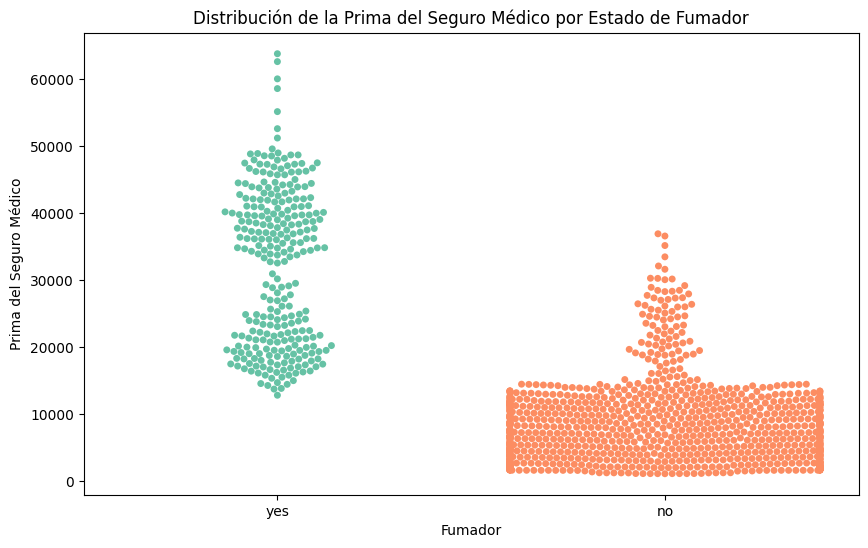

In [51]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Distribución de la Prima del Seguro Médico por Estado de Fumador')
plt.xlabel('Fumador')
plt.ylabel('Prima del Seguro Médico')
plt.show()


/tmp/ipykernel_588/58846049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children', y='charges', data=data, palette='Set2', ci=None)
/tmp/ipykernel_588/58846049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=data, palette='Set2', ci=None)


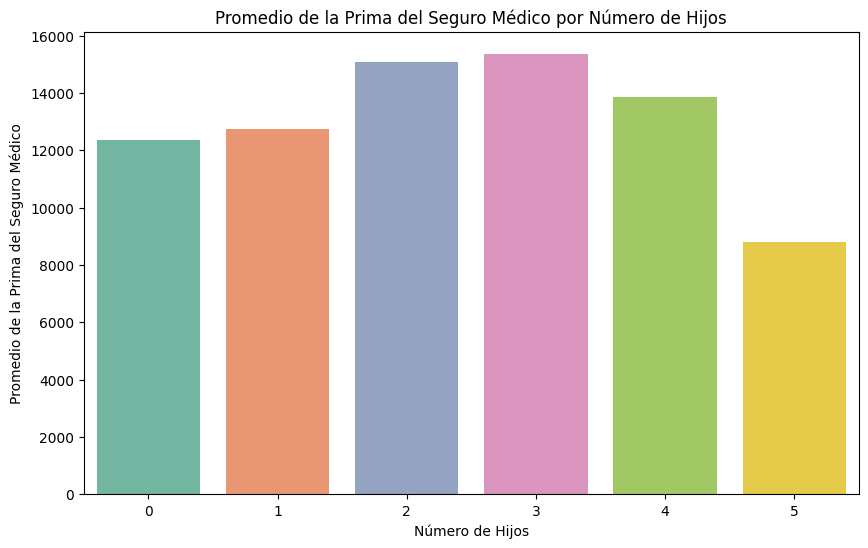

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=data, palette='Set2', ci=None)
plt.title('Promedio de la Prima del Seguro Médico por Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Promedio de la Prima del Seguro Médico')
plt.show()


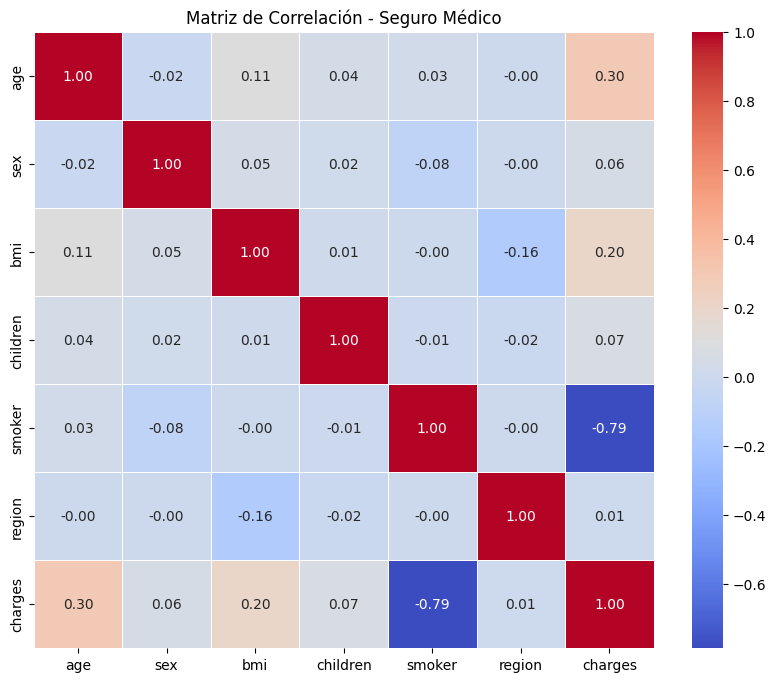

In [11]:

data['sex'] = pd.factorize(data['sex'])[0]
data['smoker'] = pd.factorize(data['smoker'])[0]
data['region'] = pd.factorize(data['region'])[0]

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - Seguro Médico')
plt.show()


In [58]:
data = data.drop(columns=['sex', 'region', 'children'])


data.head()


,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')


Error Cuadrático Medio (MSE): 33596915.85136145
Coeficiente de Determinación (R^2): 0.7835929767120724


In [10]:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Error Cuadrático Medio con Interacciones (MSE): {mse_poly}')
print(f'Coeficiente de Determinación con Interacciones (R^2): {r2_poly}')


Error Cuadrático Medio con Interacciones (MSE): 21164509.433659803
Coeficiente de Determinación con Interacciones (R^2): 0.8636735435433732
